In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [3]:
def duffing(y, t, a=1, b=1, c=.2, w=.4*np.pi, f=.2, phi=0):
    x, v = y
    return np.array([
            v,
            b*x - a*x**3 - c*v + f*np.cos(w*t + phi),
        ])

# Zadanie 1

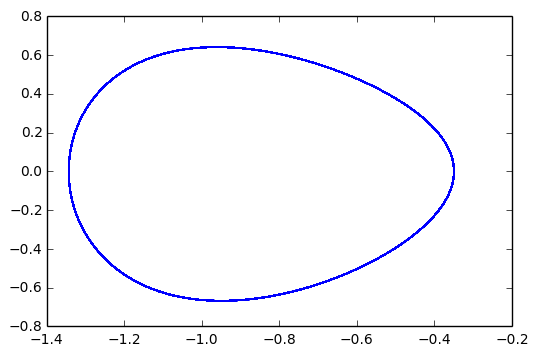

In [3]:
a = 1
b = 1
c = .2
w = .2*2*np.pi
f = .23

args = (a, b, c, w, f, 0)

time = np.linspace(0, 1000, 100000)
y = odeint(duffing, y0=[0, .05], t=time, args=args)

plt.plot(y[20000:,0], y[20000:,1])
plt.show()

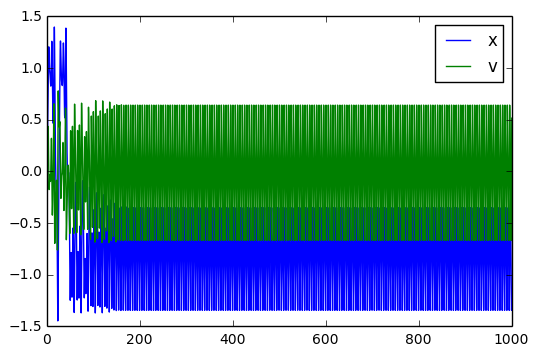

In [4]:
plt.plot(time, y[:,0], label='x')
plt.plot(time, y[:,1], label='v')
plt.legend()
plt.show()

# Zadanie 2

In [4]:
plt.rcParams['figure.figsize'] = (12, 4)

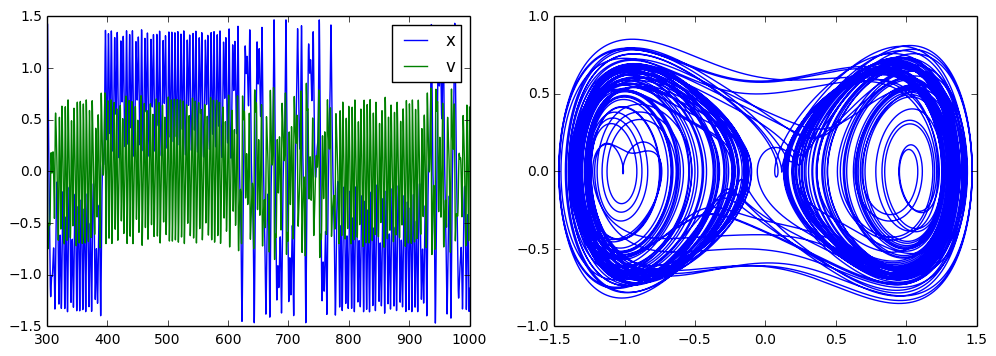

CPU times: user 901 ms, sys: 17.9 ms, total: 919 ms
Wall time: 917 ms


In [6]:
%%time
a = 1
b = 1
c = .2
w = .2*2*np.pi
f = .28
args = (a, b, c, w, f)
START_TIME = 300 * 1000

time = np.linspace(0, 1000, 1000000)
y = odeint(duffing, y0=[0, .05], t=time, args=args)

plt.subplot(121)

plt.plot(time[START_TIME:], y[START_TIME:,0], label='x')
plt.plot(time[START_TIME:], y[START_TIME:,1], label='v')
plt.legend()

plt.subplot(122)

plt.plot(y[START_TIME:,0], y[START_TIME:,1])
plt.show()

# Zadanie 3

In [ ]:
%%time
a = 1
b = 1
c = .05
w = .2*2*np.pi
f = .3
args = (a, b, c, w, f)
START_TIME = 0#300 * 10


time = np.arange(0, 10000) * 2 * np.pi / w

y = odeint(duffing, y0=[0, .05], t=time, args=args)

In [ ]:
plt.scatter(y[START_TIME:, 0], y[START_TIME:, 1], lw=0, s=1)
plt.show()

# Zadanie +

In [ ]:
for step in tqdm(range(0, 100)):
    a = 1
    b = 1
    c = .2
    w = .2*2*np.pi
    f = .210 + step * 3e-5
    args = (a, b, c, w, f)
    START_TIME = 300 * 1000

    time = np.linspace(0, 1000, 1000000)
    y = odeint(duffing, y0=[0, .05], t=time, args=args)

    plt.plot(y[START_TIME:,0], y[START_TIME:,1])
    plt.xlim(-2, 2)
    plt.ylim(-1, 1)
    plt.title("f = %.4f" % f)
    plt.savefig('lec5-anim/frame{}.png'.format(str(step).rjust(4, '0')))
    plt.close()

In [ ]:
a = 1
b = 1
c = .2
w = .2*2*np.pi
f = .2 + 0 * 1e-4
args = (a, b, c, w, f)
START_TIME = 300 * 1000

time = np.linspace(0, 1000, 1000000)
y = odeint(duffing, y0=[0, .05], t=time, args=args)

plt.plot(y[START_TIME:,0], y[START_TIME:,1])
plt.xlim(-2, 2)
plt.ylim(-1, 1)
plt.title("f = %.3f" % f)
plt.show()

# Zadanie +2

In [ ]:
for step in tqdm(range(100)):
    a = 1
    b = 1
    c = .05
    w = .2*2*np.pi
    f = .3
    phi = step * (np.pi * 2.) / 100
    args = (a, b, c, w, f, phi)
    START_TIME = 0

    time = np.arange(0, 1000) * 2 * np.pi / w

    y = odeint(duffing, y0=[0, .05], t=time, args=args, atol=1e-4, rtol=1e-4)

    plt.scatter(y[START_TIME:, 0], y[START_TIME:, 1], lw=0, s=2)
    plt.title('phi=%.3f' % phi)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.savefig('lec5-anim2/test/frame{}.png'.format(str(step).rjust(4, '0')))

    plt.close()

  7%|▋         | 7/100 [00:05<01:10,  1.32it/s]

KeyboardInterrupt: 

 21%|██        | 21/100 [00:15<00:59,  1.33it/s]

KeyboardInterrupt: 

 26%|██▌       | 26/100 [00:19<00:56,  1.31it/s]

In [7]:
import os

In [11]:
os.system('convert -delay 5 lec5-anim2/test/*.png lec5-anim2/test/anim.gif')


0